# Youtube download

In [1]:
from pytube import YouTube

from pytube import Channel
from pytube.innertube import _default_clients
from pytube import cipher
import re

_default_clients["ANDROID"]["context"]["client"]["clientVersion"] = "19.08.35"
_default_clients["IOS"]["context"]["client"]["clientVersion"] = "19.08.35"
_default_clients["ANDROID_EMBED"]["context"]["client"]["clientVersion"] = "19.08.35"
_default_clients["IOS_EMBED"]["context"]["client"]["clientVersion"] = "19.08.35"
_default_clients["IOS_MUSIC"]["context"]["client"]["clientVersion"] = "6.41"
_default_clients["ANDROID_MUSIC"] = _default_clients["ANDROID_CREATOR"]



def get_throttling_function_name(js: str) -> str:
    """Extract the name of the function that computes the throttling parameter.

    :param str js:
        The contents of the base.js asset file.
    :rtype: str
    :returns:
        The name of the function used to compute the throttling parameter.
    """
    function_patterns = [
        r'a\.[a-zA-Z]\s*&&\s*\([a-z]\s*=\s*a\.get\("n"\)\)\s*&&\s*'
        r'\([a-z]\s*=\s*([a-zA-Z0-9$]+)(\[\d+\])?\([a-z]\)',
        r'\([a-z]\s*=\s*([a-zA-Z0-9$]+)(\[\d+\])\([a-z]\)',
    ]
    #logger.debug('Finding throttling function name')
    for pattern in function_patterns:
        regex = re.compile(pattern)
        function_match = regex.search(js)
        if function_match:
            #logger.debug("finished regex search, matched: %s", pattern)
            if len(function_match.groups()) == 1:
                return function_match.group(1)
            idx = function_match.group(2)
            if idx:
                idx = idx.strip("[]")
                array = re.search(
                    r'var {nfunc}\s*=\s*(\[.+?\]);'.format(
                        nfunc=re.escape(function_match.group(1))),
                    js
                )
                if array:
                    array = array.group(1).strip("[]").split(",")
                    array = [x.strip() for x in array]
                    return array[int(idx)]

    raise RegexMatchError(
        caller="get_throttling_function_name", pattern="multiple"
    )

cipher.get_throttling_function_name = get_throttling_function_name

In [6]:
yt = YouTube('https://www.youtube.com/watch?v=YdaQFH_CyZA&t=425s&ab_channel=LoLEsportsVODsandHighlights')

In [7]:
s = yt.streams.get_by_itag(18)

In [8]:
s.download()

'/Users/hilsts/Documents/codes/BSW_LoL/competitive/cv/FNC v RGE  2024 LEC Summer  Week 2 Day 1  Fnatic vs Rogue.mp4'

In [29]:
yt.streams

[<Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="136" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.4d401f" progressive="False" type="video">, <Stream: itag="247" mime_type="video/webm" res="720p" fps="30fps" vcodec="vp9" progressive="False" type="video">, <Stream: itag="135" mime_type="video/mp4" res="480p" fps="30fps" vcodec="avc1.4d401f" progressive="False" type="video">, <Stream: itag="244" mime_type="video/webm" res="480p" fps="30fps" vcodec="vp9" progressive="False" type="video">, <Stream: itag="134" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.4d401e" progressive="False" type="video">, <Stream: itag="243" mime_type="video/webm" res="360p" fps="30fps" vcodec="vp9" progressive="False" type="video">, <Stream: itag="133" mime_type="video/mp4" res="240p" fps="30fps" vcodec="avc1.4d4015" progressive="False" type="video">, <Stream: itag="242" mime_type="vide

In [26]:
c = Channel('https://www.youtube.com/c/CBLOL')

In [27]:
c

[]

# CV

In [1]:
import cv2 
import mediapipe as mp

In [3]:
cap = cv2.VideoCapture("FNC v RGE  2024 LEC Summer  Week 2 Day 1  Fnatic vs Rogue.mp4")

cap.set(cv2.CAP_PROP_POS_FRAMES, 15000)

while True:

    success, img = cap.read()

    crop_img = img[278:360, 555:640]
    # print(len(crop_img), len(crop_img[0]))
    cv2.imshow("Image", crop_img)
    cv2.waitKey(1)

KeyboardInterrupt: 

In [16]:
cv2.destroyAllWindows()

## Template match test

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 

In [2]:
img = cv2.imread("Screenshot 2024-07-17 at 16.36.14.png", cv2.IMREAD_GRAYSCALE)
img2 = img.copy()
template = cv2.imread('minimap1.png', cv2.IMREAD_GRAYSCALE)
w, h = template.shape[::-1]
methods = ['TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR',
 'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']

In [6]:
template

array([[ 76,  80,  82, ..., 105,  72,  28],
       [ 76,  80,  85, ...,  90,  68,  28],
       [ 68,  72,  78, ...,  82,  64,  28],
       ...,
       [ 70,  64,  56, ...,  59,  43,  28],
       [ 70,  68,  68, ...,  72,  50,  21],
       [ 59,  59,  61, ...,  59,  50,  21]], dtype=uint8)

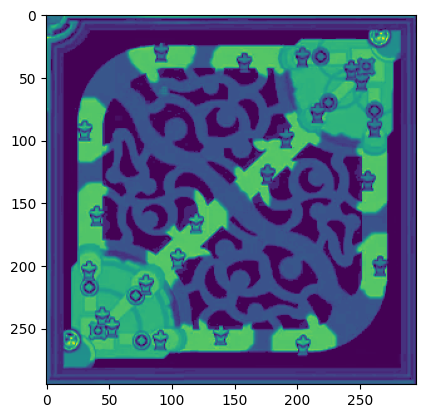

In [5]:
plt.imshow(template)
plt.show()

In [11]:
img = cv2.imread('Screenshot 2024-07-17 at 16.36.14.png')
print(len(img), len(img[0]))

837 1511


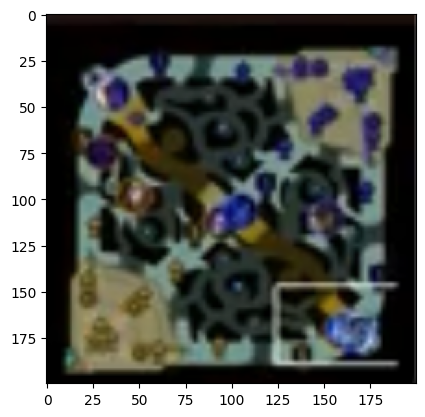

In [3]:
img = cv2.imread('Screenshot 2024-07-17 at 16.36.14.png')

crop_img = img[637:837, 1311:1511]
plt.imshow(crop_img)
plt.show()

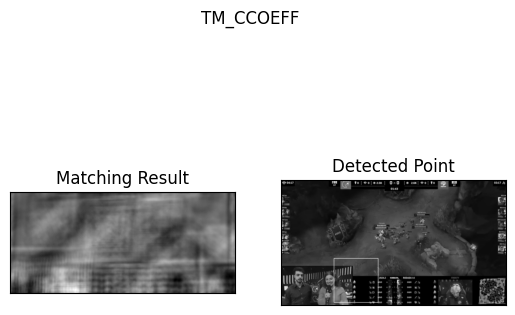

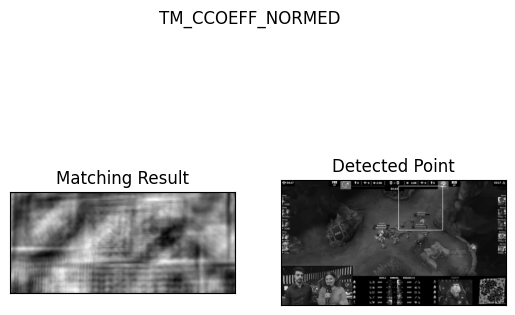

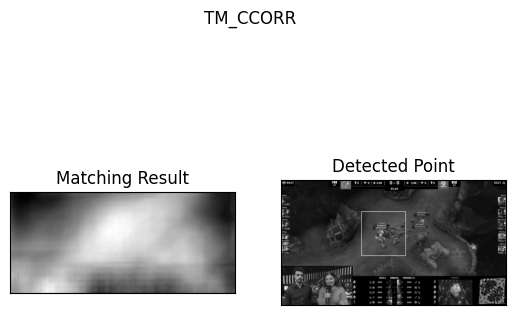

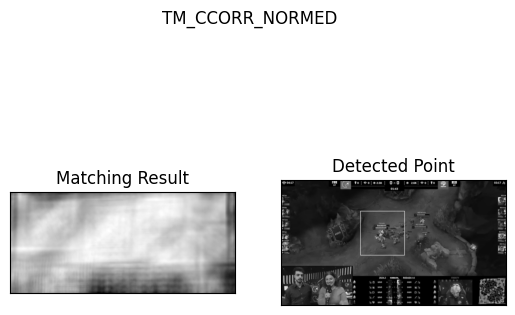

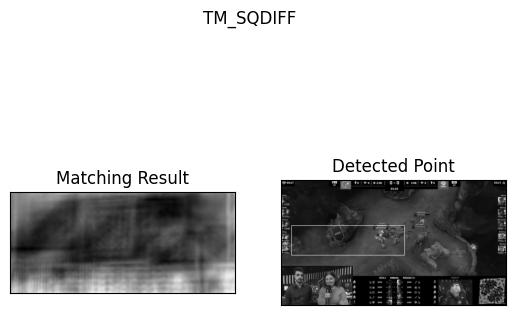

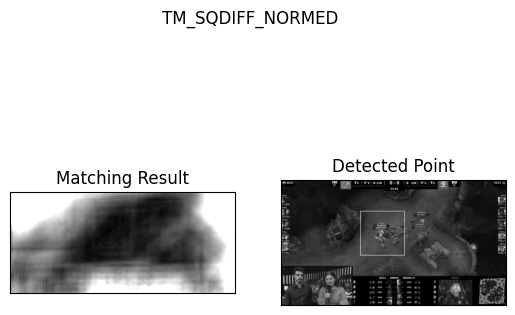

In [6]:
for meth in methods:
    img = img2.copy()
    method = getattr(cv2, meth)
    
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    
    plt.show()

In [13]:
cv2.imshow("Image", img)